<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch01_02_DNN%EA%B8%B0%EC%B4%88_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜:
* 이름:

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [3]:
import numpy as np
import tensorflow as tf

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [12]:
# 레이어는 tensorflow.kears에 있다.
from tensorflow.keras import layers, models

x = layers.Input(shape = (3), name = 'input_layer') # X : 1,3 #   (데이터 개수,3)
y = layers.Dense(1, name = 'output_layer')(x) # Linear 함수 : w,b 존재 Dense(output_shape)

model1 = models.Model(inputs = x, outputs = y, name = 'Model1_1')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model1_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


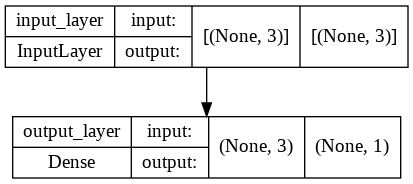

In [56]:
from tensorflow.keras import utils

#output shape : 데이터 변환과정
# param : 파라미터 개수
# None은 데이터의 개수
model1.summary() 
utils.plot_model(model1, show_shapes = True)
# Trainable param : 학습 가능한 파라미터(역전파를 통해서 업데이트)
# non trainable param : 학습 불가 파라미터 

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `model.layers.output`


In [16]:
# 데이터 변환 과정
for layer in model1.layers:
  print(layer.name) # 각 레이어의 이름 
  print(layer.output.shape) # 각 레이어의 아웃풋

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [19]:
'''
W : (3,1)
B : (1, )
'''
for param in model1.get_weights():
  print(param.shape)
print(model1.get_weights())

(3, 1)
(1,)
[array([[ 0.64340794],
       [-0.5156459 ],
       [-0.9393991 ]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [27]:
X = np.random.normal(size =(1,3))
print(X)
Y_pred = model1.predict(X)
print(Y_pred)

[[ 0.73503106 -1.18573902  1.44689019]]
[[-0.27486113]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [57]:
x = layers.Input(shape = (3,))
y = layers.Dense(2)(x)
model2 = models.Model(inputs = x, outputs = y, name ='Model_2')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_16 (Dense)            (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


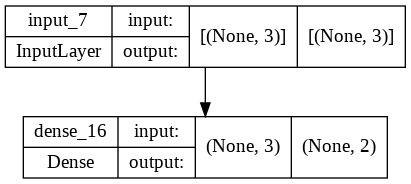

In [58]:
model2.summary()
utils.plot_model(model2, show_shapes = True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [59]:
'''
X : (N,3) N은 데이터 개수
Y : (N,2)
'''

for layer in model2.layers:
  print(layer.output.shape)

(None, 3)
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [74]:
'''
W : (3, 2) 
B : (2,)
'''

for param in model2.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 2)
(2,)
[array([[-0.07294261, -0.10345149],
       [ 0.95228267, -0.4983384 ],
       [ 0.8066429 ,  0.7519772 ]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [61]:
X = np.random.normal(size =(1,3))
print(X)
Y_pred = model1.predict(X)
print(Y_pred)

[[-1.32321246 -0.91241636 -0.6510496 ]]
[[0.23071374]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

In [62]:
x = layers.Input(shape = (3,))
z1 = layers.Dense(3)(x)
y = layers.Dense(2)(z1)
model3 = models.Model(inputs = x, outputs = y, name ='Model_3')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 2)                 8         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


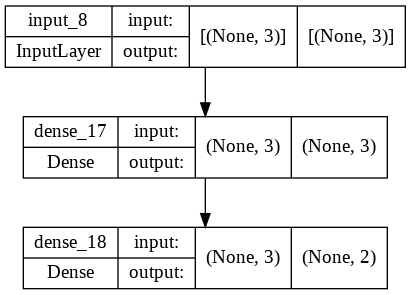

In [63]:
model3.summary()
utils.plot_model(model3, show_shapes = True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [64]:
'''
X : (N,3) N은 데이터 개수
Z : (N,3)
Y : (N,2)
'''

for layer in model3.layers:
  print(layer.output.shape)

(None, 3)
(None, 3)
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [65]:
'''
W1 : (3, 3) 
B1 : (3,)
W2 : (3, 2)
B2 : (2,)
'''

for param in model3.get_weights():
  print(param.shape)

print(model3.get_weights())

(3, 3)
(3,)
(3, 2)
(2,)
[array([[-0.515234  , -0.26173377, -0.07011485],
       [ 0.54533553, -0.65458894, -0.08688378],
       [-0.07279181, -0.9773824 , -0.63006115]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.87677026,  0.0172143 ],
       [ 0.8689774 ,  0.61266017],
       [-1.093729  ,  0.9516065 ]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [ ]:
X = np.random.normal(size =(1,3))
print(X)
Y_pred = model1.predict(X)
print(Y_pred)

### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


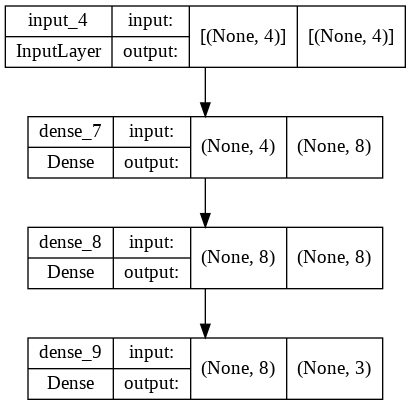

In [33]:
#from tensorflow.keras import layers, models utils
x = layers.Input(shape = (4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs = x, outputs = y, name ='Model_4')
model4.summary()
utils.plot_model(model4, show_shapes = True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [34]:
'''
X : (N,4) N은 데이터 개수
Z1 : (N,8)
Z2 : (N,8)
Y : (N,3)
'''

for layer in model4.layers:
  print(layer.output.shape)

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [36]:
'''
W1 : (4, 8) 
B1 : (8,)
W2 : (8, 8)
B2 : (8,)
W3 : (8, 3)
B3 : (3,)
'''

for param in model4.get_weights():
  print(param.shape)

print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[-0.0745244 ,  0.434259  ,  0.6757328 , -0.25601158, -0.10877192,
        -0.70585215, -0.63903016,  0.40369326],
       [-0.41876298,  0.57294136,  0.05620992,  0.16789705,  0.06567842,
        -0.27312288,  0.50442344, -0.15494514],
       [ 0.21998549, -0.2530957 ,  0.13797325,  0.24444449, -0.27378407,
        -0.25155514, -0.10619789,  0.63567287],
       [ 0.1380992 ,  0.5835852 ,  0.22590137,  0.02864772,  0.5898605 ,
         0.33080083, -0.03012776, -0.35457352]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.42790973, -0.10557532,  0.31474847, -0.4436003 , -0.4118343 ,
         0.08883369,  0.02764279,  0.56943005],
       [-0.24513766,  0.04475296,  0.5870406 , -0.5647506 , -0.10595626,
         0.27990735,  0.02815455, -0.52913743],
       [-0.09307402, -0.2707721 , -0.59242874, -0.0914458 ,  0.06649131,
         0.36099792, -0.35585913, -0.3089531 ],
       [-0.4902263 , -0.6055472 , -0.476649

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [38]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.54733321  0.92335105  0.11532198 -0.54379663]] (1, 4)
Y_pred: [[ 0.8586933  -0.15502171  0.02210049]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [39]:
# 위에는 샘플 하나만 들어간걸로 했음
# 여기서는 10개의 샘플을 한번에 넣음
# 실제 데이터 (1000~100000 중에 배치단위로 계산이 진행됨) 배치 사이즈 : 8, 16, 32, 64....
X = np.random.normal(size=(10,4)) # 배치의 개수가 10개다
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[-1.61830277 -1.73941527 -0.21801247 -0.49026172]
 [-0.59035324  0.84994215  0.36580151  1.02090701]
 [-1.5796041   1.31353467  0.18261624 -0.46896904]
 [ 0.84557844  0.80910524  1.10837964  0.99301471]
 [ 0.54357782 -0.11118652  0.13994008 -0.79446553]
 [-0.71314976 -1.88751437  1.19546563 -0.50435072]
 [ 0.51752878  0.70662968 -0.19177227 -1.72286626]
 [-0.17098097  1.0214869  -0.4208033   0.2062854 ]
 [-1.66783794  0.56773658  0.68044286 -0.21885211]
 [ 0.52490672  0.75433513 -2.57491961  0.43928595]] (10, 4)
Y_pred: [[ 1.4433265e-03  1.0669729e+00  1.5165299e-01]
 [-5.0419199e-01  3.4124136e-02 -1.1280758e+00]
 [ 1.1886328e+00  1.0408804e+00 -1.4157476e+00]
 [-2.5305676e-01 -8.0605268e-01 -2.6989573e-01]
 [ 7.9120845e-01 -8.6612254e-02  6.4557523e-01]
 [ 6.2526011e-01  5.0279188e-01  7.6833582e-01]
 [ 1.8343557e+00  2.1306473e-01  5.2401423e-01]
 [-8.4676929e-02  5.8217421e-02 -7.0620549e-01]
 [ 9.6670645e-01  9.9768251e-01 -1.1581655e+00]
 [-1.6502156e+00 -3.3415091e-01 -2.828

## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


In [40]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import numpy as np
tf.__version__

'2.8.2'

아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [42]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model1():
  x = layers.Input(shape = (3,))
  z1 = layers.Dense(6)(x)
  z2 = layers.Dense(6)(z1)
  y = layers.Dense(1)(z2)
  model = models.Model(x, y)
  return model

* 시각화

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_13 (Dense)            (None, 6)                 24        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


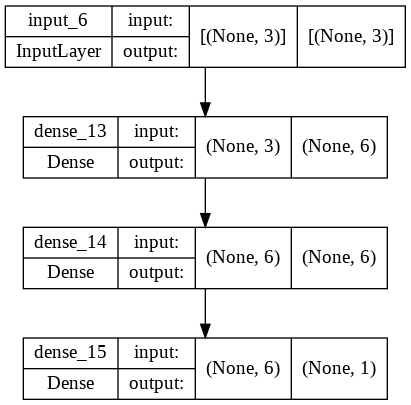

In [44]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes=True)

### | Keras Sequential API



* 모델 구현: `Sequential()`

In [54]:
def build_model2():
  model = tf.keras.Sequential.Model(x,y) # 빈 껍질을 만들어 놓은것
  model.add(layers.Input(shape = (3,)))
  model.add(layers.Dense(6))
  model.add(layers.Dense(6))
  model.add(layers.Dense(1))
  return model

* 모델 시각화

In [55]:
m2 = build_model2()
m2.summary()
utils.plot_model(m1, show_shapes=True)

AttributeError: ignored

### | Model Class Subclassing

* 모델 구현

In [49]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어있는(init) 파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (3)
    self.dense1 = layers.Dense(6, name = 'dense1')
    self.dense2 = layers.Dense(6, name = 'dense2')
    self.dense3 = layers.Dense(3, name = 'dense3')
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  21        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


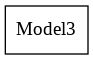

In [53]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


In [66]:
def build_model1():
  x = layers.Input(shape = (4,))
  z1 = layers.Dense(8)(x)
  z2 = layers.Dense(8)(z1)
  y = layers.Dense(3)(z2)
  model = models.Model(x, y)
  return model

* keras Sequential API


In [67]:
def build_model2():
  model = tf.keras.Sequential.Model(x,y) # 뼈대에 부가적으로 붙이는 방법
  model.add(layers.Input(shape = (4,)))
  model.add(layers.Dense(8))
  model.add(layers.Dense(8))
  model.add(layers.Dense(3))
  return model

* Model Class Subsclassing




In [68]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어있는(init) 파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (4)
    self.dense1 = layers.Dense(8, name = 'dense1')
    self.dense2 = layers.Dense(8, name = 'dense2')
    self.dense3 = layers.Dense(3, name = 'dense3')
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


In [70]:
def build_model1():
  x = layers.Input(shape = (3,))
  z1 = layers.Dense(4)(x)
  z2 = layers.Dense(8)(z1)
  z3 = layers.Dense(4)(z2)
  y = layers.Dense(1)(z3)
  model = models.Model(x, y)
  return model

* keras Sequential API


In [71]:
def build_model2():
  model = tf.keras.Sequential.Model(x,y) # 뼈대에 부가적으로 붙이는 방법
  model.add(layers.Input(shape = (3,)))
  model.add(layers.Dense(4))
  model.add(layers.Dense(8))
  model.add(layers.Dense(4))
  model.add(layers.Dense(1))
  return model

* Model Class Subsclassing



In [69]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어있는(init) 파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (3)
    self.dense1 = layers.Dense(4, name = 'dense1')
    self.dense2 = layers.Dense(8, name = 'dense2')
    self.dense3 = layers.Dense(4, name = 'dense3')
    self.dense4 = layers.Dense(1, name = 'dense4')
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    y = self.dense4(y)
    return y